#**Credit Card Default Risk Analysis**
By: Denzel Chike

Date: 05/08/2025

University of North Texas


#*Abstract & Keywords*

My project focuses on credit card users who are at risk of default. A default means someone who has failed to make the minimum required monthly payment for the credit card. The consequences that come with missing a payment are late fees, interest rises, might get sent to collections, legal action, and more. This is a major concern for banking organizations and customers who bank with them. I chose to analyze the UCI Credit Card Default dataset from Kaggle to identify patterns and predictors for default behavior by using machine learning predictive model techniques. I used feature engineering methods to get new variables, like credit utilization and payment history, that is categorized. This helps by improving the prediction strength and providing a better understanding of the model. I used both Logistic Regression and Random Forest models that were trained and used metrics like accuracy, precision, recall, and a confusion matrix. The results showed that customer financial behavior, including using their credit cards a lot and paying bills late, can determine whether or not they’ll miss their upcoming payment or default on their credit. This analysis project has good insights for banks to see who might not pay their loans, which helps them make smarter decisions on who should get approved for credit.

Keywords: credit risk, logistic regression, random forest, default, prediction, payment history, and credit utilization.


#*Introduction & Motivation*
Customer credit card debt has been growing, and as it grows means a higher risk of default payments. In a press release, the Federal Reserve Bank of New York stated, “The report shows total household debt increased by $93 billion (0.5%) in Q4 2024, to $18.04 trillion” (Federal Reserve Bank of New York, 2025). Financial organizations are using data-driven solutions to find and manage default risks. By using predictive modeling for default risk, it helps banks and credit providers to make better decisions when it comes to lending money and provides strategies for high-risk individuals. The goal of this project is to analyze and explore key factors for credit card default by using real-world data. Analyzing certain factors like demographic and financial behaviors data using machine learning models helps predict whether a customer will default on their credit card payment. Apart from the performance of the model, the project emphasizes understanding and clarity by using feature engineering and data visualization. I was motivated to build tools that can be used by financial analysts and advisors in real-world financial applications.    

#*Related Work / Methodologies*

There were many studies that explored and used machine learning models like random forest, logistic regression, and neural networks for credit scoring and predicting default. Logistic Regression is a statistical method that is used to predict the probability of a binary outcome based on one or more variables. In our case, we will be using this to predict who will hit default. Logistic Regression has always been a popular method to investigate things like credit and fraud. One existing methodology that I found is an article called "Prediction of Default Probability of Credit-Cards Bills" by Yuhan Ma. They created a credit scoring model to predict credit card default by using a dataset of 30,000 clients. They used the XGBoost machine learning algorithm, which stands for Extreme Gradient Boosting, that creates and continuously generates simple decision trees to find the most impactful factors affecting default risk. They cleaned the data and removed outliers and trained the model, and achieved an AUC of 0.779. What makes my project stand out is by use of feature engineering methods like credit utilization and transforming repayment status into categorical variables. I also analyzed demographics and trends for specific genders, which I believe are overlooked in quantitative models.    


Existing Methodologies:
https://www.scirp.org/journal/paperinformation?paperid=97459
Ma, Y. (2020). Prediction of Default Probability of Credit-Card Bills. Open Journal of Business and Management, 08(01), 231–244. https://doi.org/10.4236/ojbm.2020.81014


#*Data*

The data I am using for this project is from Kaggle. This data is called the UCI Credit Card Default dataset. The UCI Credit Card Default data contains 30,000 samples and 23 attributes. The metadata consists of demographic information like age, gender, marital status, and education. The other attributes are financial limits, which are credit limit, bill amount, previous payments, and repayment history of six months. The purpose is to have a binary label that shows if the client missed their payment, also known as default, that was due the next month. I did preprocessing that handled missing values and also removed invalid rows. I added a new feature called credit utilization, which finds the ratio of the bill amount to the credit limit. I used bins to categorize the function into low, medium, high, and very high usage. PAY_0 was also categorized into “Current or Early” and “Delayed” to see who paid early and who hit default.

In [ ]:
credit_card = pd.read_csv('/content/UCI_Credit_Card.csv')
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#*Method & Implementation*


In order to use these certain models, I had to use Python libraries like Pandas, NumPy, Scikit-learn, Seaborn for visualization, and Matplotlib. The UCI Credit Card Default data was split into test and training sets, which used a 70/30 ratio to make sure performance evaluation was reliable. I used a logistic regression model, which served as a base given its simplicity and interpretability. I then used a Random Forest Classifier, a combined technique that uses decision tree bagging to improve performance. Basically the Random Forest model will build a lot of decision trees, while each tree collects a certain amount of the data, then each tree will give a prediction, and the majority vote wins. I implemented feature engineering by creating new features like credit utilization, and I recoded PAY_0 into a binary category so it can represent the payment timeline. I used Seaborn and Matplotlib to focus heavily on data visualization to get a better understanding of the patterns in the dataset. I also created plots, which helped see how certain categories were linked to a possible default status. Every code was written down in a Google Colab notebook with outputs, and made the project layout easy for someone to follow.


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Feature Engineering


In [ ]:
#Creating Credit Utilization
credit_card['credit_utilization'] = np.where(credit_card['LIMIT_BAL'] > 0,
                                             credit_card['BILL_AMT1'] / credit_card['LIMIT_BAL'], np.nan)

#Utilization Levels Categorized
bins = [-np.inf, 0.3, 0.6, 1, np.inf]
labels = ['Low (<30%)', 'Medium (30-60%)', 'High (60-100%)', 'Very High (>100%)']
credit_card['utilization_category'] = pd.cut(credit_card['credit_utilization'], bins=bins, labels=labels)

#Payment History Categorized
credit_card['payment_history'] = credit_card['PAY_0'].apply(lambda x: 'Current or Early' if x <=0 else 'Delayed')

#*Experiments & Results*


Once I cleaned and split the data, I moved on to testing and training the models. The Logistic regression performance came out good by hitting around 81% accuracy, but it didn't do well when it came to finding defaulters; its positive class recall was low. But on the other hand Random Forest model performed and produced more trustworthy results compared to Logistic Regression. It picked up more of those at risk of default cases, and it also cut down on false negatives, which is good in the finance field because a missing defaulter can suffer serious consequences. Random Forest made more accurate predictions overall when I looked at the confusion matrix. The trends on the visualization helped back up how accurate the Random Forest is by showing that customers with really high credit utilization, which is over 100%  that were likely to default. Another finding was that there was an increase in default rates in male customers. This tells me that utilization and repayment patterns are strong features to detect default risk.    


# Data Preprocessing

In [ ]:
#Drop any rows with missing values
credit_card.dropna(inplace=True)

# Default by Gender - Visualization

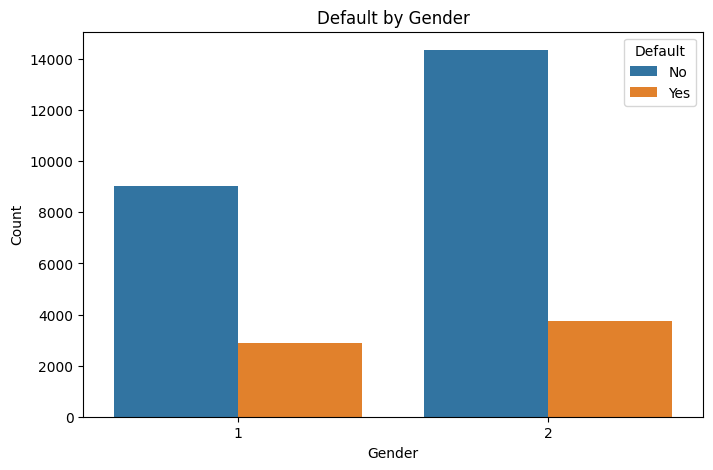

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=credit_card, x='SEX', hue='default.payment.next.month')
plt.title('Default by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

In [ ]:
default_rate_by_gender = credit_card.groupby('Gender') ['default.payment.next.month'].mean()
print(default_rate_by_gender)


Gender
Female    0.207763
Male      0.241672
Name: default.payment.next.month, dtype: float64


**Graph Conclusion:**
- This is a bar chart where 1 is males and 2 is Females. Although the bar chart shows that Females have more defaulters you have ratio that theres more Females that are NOT at risk of default than Males. But gender by itself was not a strong predictor.  

# Default by Utilization Category - Visualization

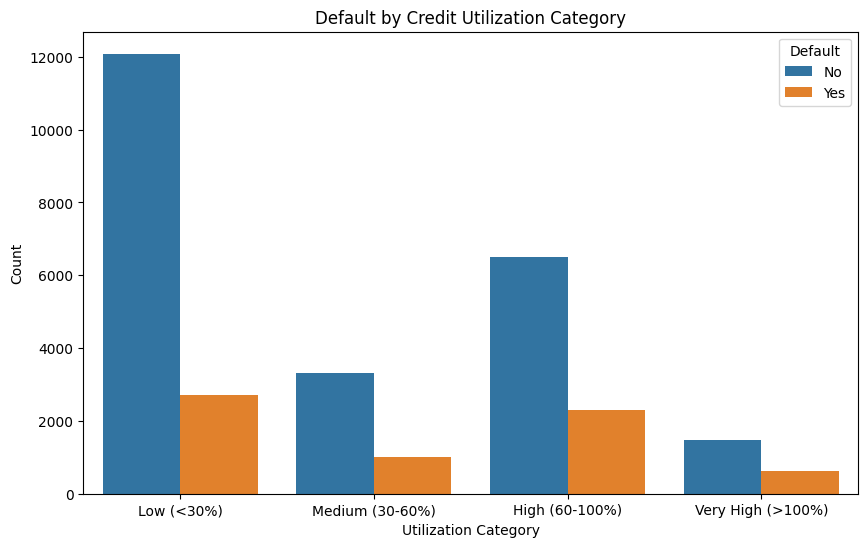

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=credit_card, x='utilization_category', hue='default.payment.next.month')
plt.title('Default by Credit Utilization Category')
plt.xlabel('Utilization Category')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

In [ ]:
default_rate_by_util = credit_card.groupby('utilization_category')['default.payment.next.month'].mean()
print(default_rate_by_util)

utilization_category
Low (<30%)           0.183060
Medium (30-60%)      0.232002
High (60-100%)       0.260983
Very High (>100%)    0.300709
Name: default.payment.next.month, dtype: float64


<ipython-input-23-8ec35c913381>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_util = credit_card.groupby('utilization_category')['default.payment.next.month'].mean()


**Graph Conclusion:**
- Default increases when credit utilization category increase. It shows that the very high category has the highest number of defaults.  

# Correlation Heatmap - Visualization

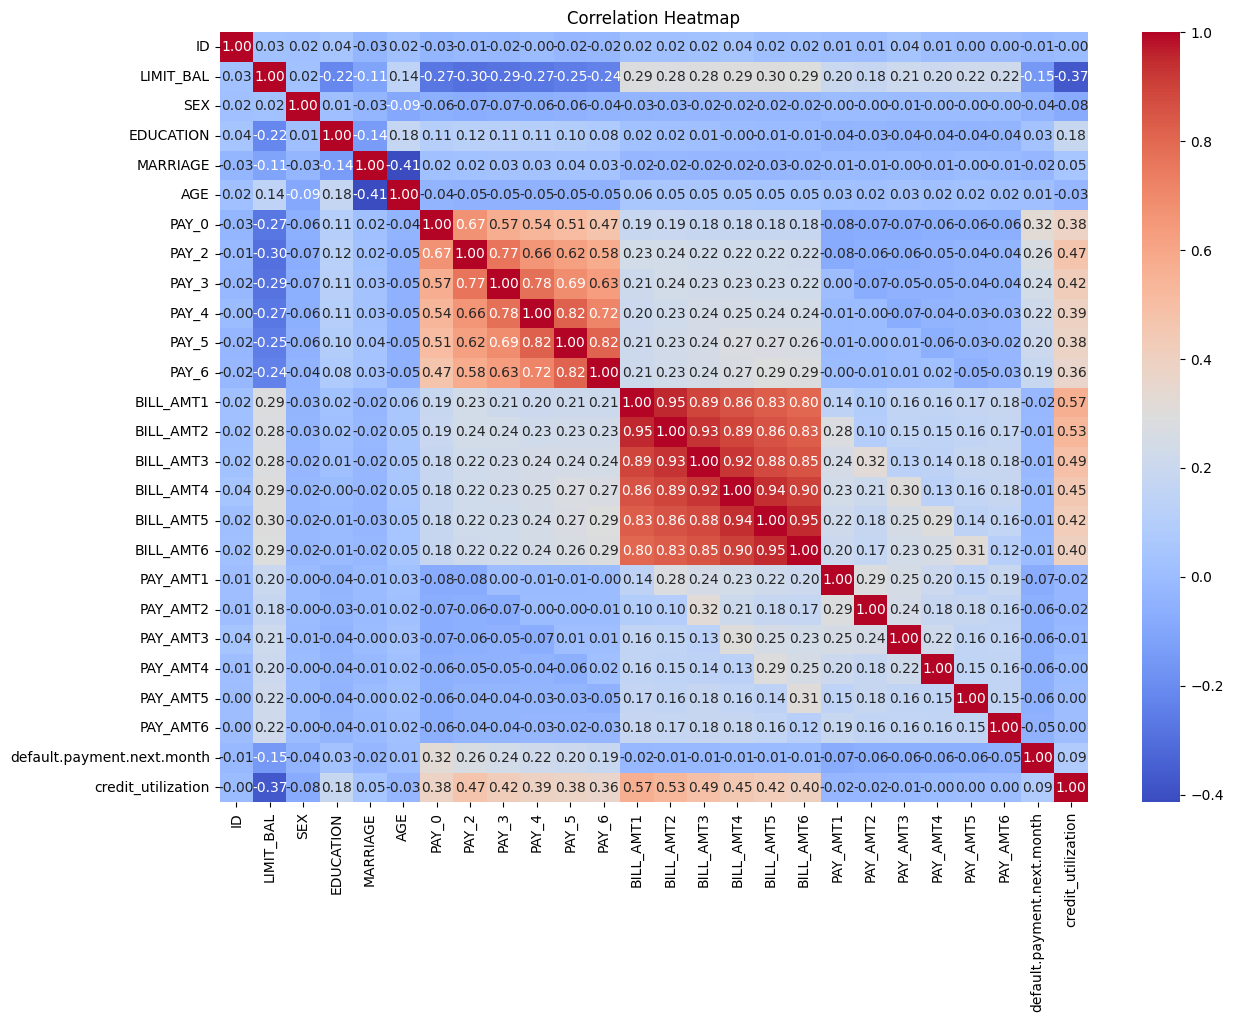

In [ ]:
plt.figure(figsize=(14,10))
numerical_features = credit_card.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Graph Conclusion:**
- The heatmap shows the correlation between default staus and payment delays (PAY_0 & PAY_2) is positive while bill and payments correlation is negative.  

#*Five Contributions*


**Feature Engineering**

- This first contribution was finding a way to tell a story which was by transforming raw columns into features rather than using the dataset as it came. I created a ratio called the credit utilization ratio that showed how much credit was given to each customer and categorized them by low, medium, high, and very high. By combining this feature with repayment behavior helps show which users were at default risk. Last but not least, payment history was grouped into labels to show which users were paying their bills and falling behind.

**Data Visualization of Trends**

- I used Seaborn and Matplotlib for the visualization of different variables to detect default patterns. With the help of credit utilization groups, I was able to find that users using more than their credit limit were at high risk of default. By including other variables like gender, I was able to find that male users had a higher chance of hitting the default than female users. Providing this visualization will help explain the data to stakeholders.  

**Model Comparison: Logistic Regression vs Random Forest**

- Instead of sticking with one predictive model, I used two different predictive models, which are Logistic Regression and Random Forest. It helped me understand the balance between interpretability and predictive power. My accuracy rate for Logistic Regression was 81%, but it failed to identify users who could be at risk of default, cause the recall for the positive class was low. Whereas the Random Forest model did better at finding high-risk defaulters.
      
**Focused Evaluation Metrics: What Matters**

- Getting predictive power is not good enough in the finance world. What's more important is the recall, which tells you how good a model did to identify defaulters. Confusion matrices and classification reports helped with accuracy which led us to find that Random Forest reduced false negatives better than Logistic Regression. Failing to catch a user at risk of hitting the default can lead to risky credit. That's why it is very important that I focus on the right metrics in order for this project to match real-world priorities.
  
**Feature Important for Real World Explanation**

- Random Forest helped extract feature importance scores. By having the Random Forest model create a bunch of decision trees, it was able to tell me which variable the model relied on the most. The variables that the model relied on the most were credit utilization and repayment history ranked. This helps share insights with users before making any credit decision.


# Train/Test Data

In [ ]:
#Data Training
X = credit_card.drop(columns=['ID', 'default.payment.next.month'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = credit_card['default.payment.next.month']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print('\nLogistic Regression Metrics:')
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.66      0.19      0.29      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.58      0.59      6000
weighted avg       0.78      0.80      0.75      6000

[[4562  125]
 [1067  246]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Model

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print('\nRandom Forest Metrics:')
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4418  269]
 [ 834  479]]


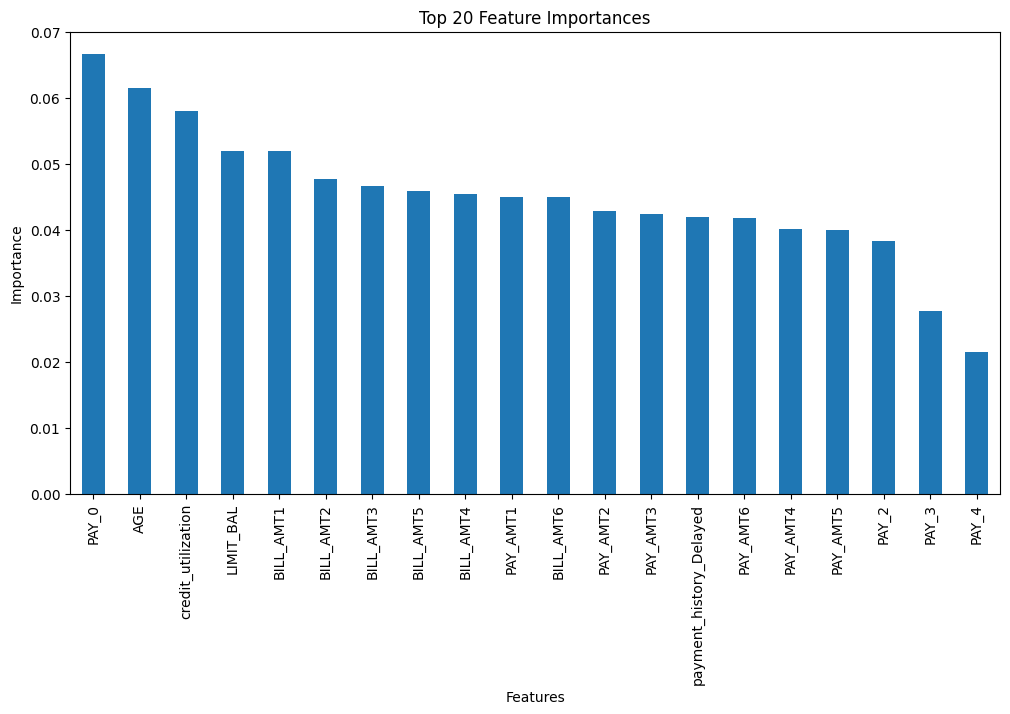

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
feat_importances[:20].plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#*Limitations & Future Work*


One limitation was that the dataset is a bit outdated, meaning the way users use credit and borrow money has changed from then to today. A second limitation that I realized is that there's no constant update on a user's income, credit limit, bills, and more. Not seeing how these certain variables go up and down made it difficult to see if they could have a chance of hitting default. The final third limitation was that the dataset didn't have a balanced mix of users who paid and didn't pay their bills. It involved more non-defaulters than defaulters, which makes it harder for predictive models to find the people who might default.


#*Conclusion*


My goal for this project was “Can we predict a user at risk of hitting default on a credit card?” I cleaned the dataset, provided visual insights, and used two machine learning predictive models in order to fulfill my goal. Credit utilization, which tells us how much credit you're using, and payment history, which shows if a user is paying their bills on time, were good predictors to see if someone might default. The Random Forest model did better than Logistic regression in finding defaulters. When dealing with any machine learning project, I like to conclude it with a final saying of my findings, and for this project, it is “People who max out their credit cards or miss payments are more likely to be at risk of hitting default”.


#*Reference*

- Ma, Y. (2020b). Prediction of Default Probability of Credit-Card Bills. Open Journal of Business and Management, 08(01), 231–244. https://doi.org/10.4236/ojbm.2020.81014

- Munsch, C. (2025). Household Debt Balances Continue Steady Increase; Delinquency Transition Rates Remain Elevated for Auto and Credit Cards - FEDERAL RESERVE BANK of NEW YORK. Retrieved from Newyorkfed.org website: https://www.newyorkfed.org/newsevents/news/research/2025/20250213

- UCI Machine Learning. (2016). Default of Credit Card Clients Dataset. Retrieved from Kaggle.com website: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv
